In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers, regularizers, datasets
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.optimizers import SGD

# Building GoogleNet

In [0]:
ilsvrc_shape = (224,224,3) # the shape of input in the paper (I believe it is the ILSVRC_2012 dataset)
cifar_shape = (32,32, 3)
mnist_shape = (28,28,1)

ilsvrc_classes = 1000
cifar_classes = 10
mnist_classes = 10

In [3]:
input = Input(shape=cifar_shape)

model = Conv2D(64, (7, 7), strides=2, padding='same', activation='relu', input_shape=cifar_shape)(input)
model = BatchNormalization()(model)
model = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(model)

model = Conv2D(64, (1, 1), activation='relu')(model)
model = Conv2D(192, (3, 3), padding='same', activation='relu')(model)
model = BatchNormalization()(model)
model = MaxPooling2D((3, 3), strides=2, padding='same')(model)

# INCEPTION MODULE
tower_1 = Conv2D(64, (1, 1), activation='relu')(model)
tower_2 = Conv2D(96, (1, 1), activation='relu')(model)
tower_2 = Conv2D(128, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(16, (1, 1), activation='relu')(model)
tower_3 = Conv2D(32, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(32, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
# INCEPTION MODULE
tower_1 = Conv2D(128, (1, 1), activation='relu')(model)
tower_2 = Conv2D(128, (1, 1), activation='relu')(model)
tower_2 = Conv2D(192, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(32, (1, 1), activation='relu')(model)
tower_3 = Conv2D(96, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(64, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
model = MaxPooling2D((3, 3), strides=2, padding='same')(model)

# INCEPTION MODULE
tower_1 = Conv2D(192, (1, 1), activation='relu')(model)
tower_2 = Conv2D(96, (1, 1), activation='relu')(model)
tower_2 = Conv2D(208, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(16, (1, 1), activation='relu')(model)
tower_3 = Conv2D(48, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(64, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
# INCEPTION MODULE
tower_1 = Conv2D(160, (1, 1), activation='relu')(model)
tower_2 = Conv2D(112, (1, 1), activation='relu')(model)
tower_2 = Conv2D(224, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(24, (1, 1), activation='relu')(model)
tower_3 = Conv2D(64, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(64, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
# INCEPTION MODULE
tower_1 = Conv2D(128, (1, 1), activation='relu')(model)
tower_2 = Conv2D(128, (1, 1), activation='relu')(model)
tower_2 = Conv2D(256, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(24, (1, 1), activation='relu')(model)
tower_3 = Conv2D(64, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(64, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
# INCEPTION MODULE
tower_1 = Conv2D(112, (1, 1), activation='relu')(model)
tower_2 = Conv2D(144, (1, 1), activation='relu')(model)
tower_2 = Conv2D(288, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(32, (1, 1), activation='relu')(model)
tower_3 = Conv2D(64, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(64, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
# INCEPTION MODULE
tower_1 = Conv2D(256, (1, 1), activation='relu')(model)
tower_2 = Conv2D(160, (1, 1), activation='relu')(model)
tower_2 = Conv2D(320, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(32, (1, 1), activation='relu')(model)
tower_3 = Conv2D(128, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(128, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
model = MaxPooling2D((3, 3), strides=2, padding='same')(model)

# INCEPTION MODULE
tower_1 = Conv2D(256, (1, 1), activation='relu')(model)
tower_2 = Conv2D(160, (1, 1), activation='relu')(model)
tower_2 = Conv2D(320, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(32, (1, 1), activation='relu')(model)
tower_3 = Conv2D(128, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(128, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
# INCEPTION MODULE
tower_1 = Conv2D(384, (1, 1), activation='relu')(model)
tower_2 = Conv2D(192, (1, 1), activation='relu')(model)
tower_2 = Conv2D(384, (3, 3), padding='same', activation='relu')(tower_2)
tower_3 = Conv2D(48, (1, 1), activation='relu')(model)
tower_3 = Conv2D(128, (5, 5), padding='same', activation='relu')(tower_3)
tower_4 = MaxPooling2D((3, 3), strides=1, padding='same')(model)
tower_4 = Conv2D(128, (1, 1), activation='relu')(tower_4)
model = Concatenate(axis=-1)([tower_1, tower_2, tower_3, tower_4])
model = AveragePooling2D((1,1), strides=1, padding='valid')(model)

model = Flatten()(model)
model = Dropout(0.4)(model)
model = Dense(cifar_classes, activation='linear')(model)
output = Dense(cifar_classes, activation='softmax')(model)

model = Model(input, output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 16, 16, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 8, 8, 64)     0           batch_normalization[0][0]        
______________________________________________________________________________________________

## CIFAR10

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [4]:
(train_images_cifar, train_labels_cifar), (test_images_cifar, test_labels_cifar) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images_cifar, test_images_cifar = train_images_cifar / 255.0, test_images_cifar / 255.0


print('train_images_cifar:', train_images_cifar.shape)
print('train_labels_cifar:', train_labels_cifar.shape)
print('test_images_cifar:', test_images_cifar.shape)
print('test_labels_cifar:', test_labels_cifar.shape)

170500096/170498071 [==============================] - 3s 0us/step
train_images_cifar: (50000, 32, 32, 3)
train_labels_cifar: (50000, 1)
test_images_cifar: (10000, 32, 32, 3)
test_labels_cifar: (10000, 1)


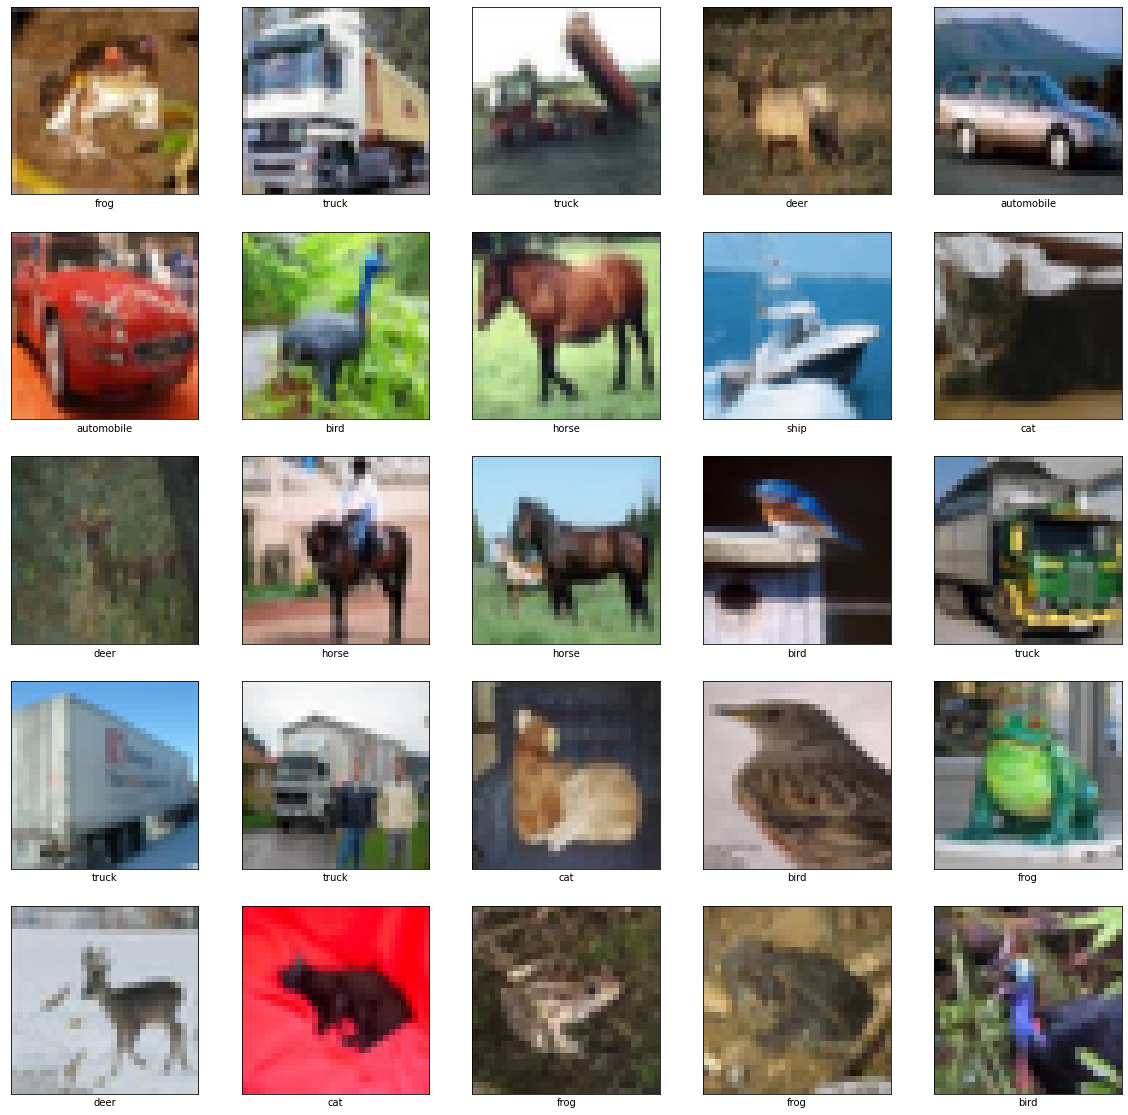

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_cifar[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels_cifar[i][0]])
plt.show()

In [0]:
sgd = optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_images_cifar, 
                      train_labels_cifar, 
                      batch_size=256,
                      epochs=200,
                      validation_data=(test_images_cifar, test_labels_cifar))

Epoch 1/200
  8/196 [>.............................] - ETA: 8:29 - loss: 2.3027 - accuracy: 0.0996

In [0]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()